# Collaborative Filtering Recommender System

## Import Libraries

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import Image

In [273]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=columns)
df.shape

(100000, 4)

### Read train and test data

In [274]:
r_cols = ['user_id', 'item_id', 'rating', 'timestamp']
train = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
train.shape, test.shape

((90570, 4), (9430, 4))

In [275]:
df.head(n=2)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742


In [276]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head(n=2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [277]:
# Merge 2 dataet together
df = pd.merge(df,movie_titles,on='item_id')
train = pd.merge(train,movie_titles,on='item_id')
test = pd.merge(test,movie_titles,on='item_id')
train.head()

,user_id,item_id,rating,timestamp,title
0,1,1,5,874965758,Toy Story (1995)
1,2,1,4,888550871,Toy Story (1995)
2,6,1,4,883599478,Toy Story (1995)
3,10,1,4,877888877,Toy Story (1995)
4,13,1,3,882140487,Toy Story (1995)


# Exploratory Data Analysis (EDA)

In [278]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [280]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [281]:
ratings['number_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


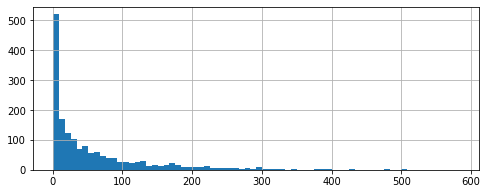

In [282]:
#We can see from the below figure that most of the movies have few number of ratings.
plt.figure(figsize=(8,3))
ratings['number_ratings'].hist(bins=70)

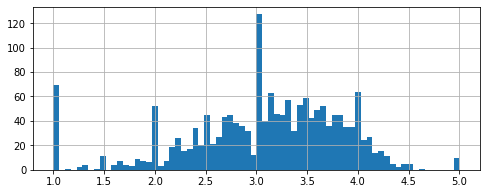

In [283]:
# This histogram shows the distribution of rating 
plt.figure(figsize=(8,3))
ratings['rating'].hist(bins=70)

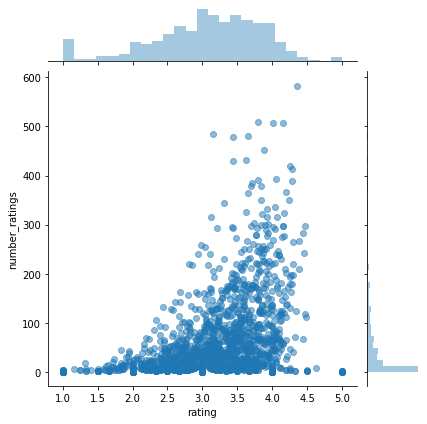

In [284]:
# More rating highest number of rating
sns.jointplot(x='rating',y='number_ratings',data=ratings,alpha=0.5)
plt.show()

# Find Similar Movies

In [285]:
movie_matrix = df.pivot_table(index='user_id',columns='title',values='rating')

In [286]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [287]:
def find_similar_movies(movie_name):
    #Select user ratings for two movies 
    movie_user_ratings = movie_matrix[movie_name]

    # Find correlations between series with corrwith (instead of corr)
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)

    # Removing NaN values and using a DataFrame instead of a series 
    corr_movies = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movies.dropna(inplace=True)

    corr_movies = corr_movies.join(ratings['number_ratings'])

    result = corr_movies[corr_movies['number_ratings']>100].sort_values('Correlation',ascending=False).head()
    return result

In [288]:
find_similar_movies('Die Hard (1988)')

,Correlation,number_ratings
title,,
Die Hard (1988),1.000000,243
Die Hard: With a Vengeance (1995),0.577216,151
Die Hard 2 (1990),0.510473,166
Absolute Power (1997),0.477706,127
Nikita (La Femme Nikita) (1990),0.444070,127


# Recommendation Engine - collaborative filtering model from scratch

In [291]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
n_users,n_items

(943, 1682)

In [329]:
# create a user-item matrix which can be used to calculate the similarity between users and items

data_matrix = np.zeros((n_users, n_items))
for line in df.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]
    
train_data_matrix = np.zeros((n_users, n_items))
# unpack the Pandas object
for line in train.itertuples():
    # adjust to count rows and cols from 0 and fill in the matrix
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((n_users, n_items))
for line in test.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [331]:
# calculating the similarity by using the pairwise_distance from sklearn to calculate the cosine similarity
from sklearn.metrics.pairwise import pairwise_distances 

# user-user similarity
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')

# item-item similarity
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

user_similarity.shape , item_similarity.shape

((943, 943), (1682, 1682))

we can make a prediction by applying the following formula for user-based CF.


1) We can look at the similarity between users k and a as weights that are

2)  multiplied by the ratings of a similar user a (corrected for the average rating of that user)

3) We need to normalize it so that the ratings stay between 1 and 5

4) As a final step, sum the average ratings for the user that you are trying to predict.

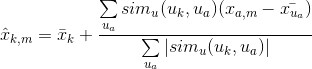

In [344]:
Image('user-based.gif',width=300, height=200)

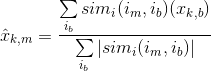

In [347]:
# Also, we can make a prediction by applying the following formula for item-based CF.

Image('item-based.gif',width=200, height=200)

In [332]:
#make predictions based on these similarities

def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [351]:
user_prediction = predict(data_matrix, user_similarity, type='user')
item_prediction = predict(data_matrix, item_similarity, type='item')

user_prediction.shape,item_prediction.shape

((943, 1682), (943, 1682))

In [353]:
user_prediction

array([[ 2.072339,  0.735088,  0.629765,  1.013569, ...,  0.394872,  0.393581,  0.393082,  0.392822],
       [ 1.758147,  0.378722,  0.195412,  0.720133, ..., -0.08516 , -0.086014, -0.084507, -0.084231],
       [ 1.773194,  0.322098,  0.156795,  0.670121, ..., -0.132964, -0.133651, -0.131865, -0.131658],
       [ 1.725627,  0.289116,  0.128227,  0.637593, ..., -0.160439, -0.161254, -0.159748, -0.159537],
       ...,
       [ 1.805997,  0.414643,  0.283264,  0.709854, ...,  0.015873,  0.014819,  0.015306,  0.015556],
       [ 1.625039,  0.27392 ,  0.109782,  0.617497, ..., -0.166133, -0.167195, -0.166142, -0.166206],
       [ 1.80936 ,  0.403271,  0.273252,  0.725122, ..., -0.00767 , -0.008679, -0.007986, -0.007606],
       [ 1.84806 ,  0.482515,  0.385743,  0.786026, ...,  0.147419,  0.146119,  0.145647,  0.145794]])

## Evaluation

In [337]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.105678174637224
Item-based CF RMSE: 3.588904192097963


## Model-based collaborative filtering

$$X = USV^{T}$$



In [339]:
sparsity = round(1.0-len(df)/float(n_users*n_items), 3)
print('The sparsity level of MovieLens100K is ' + str(sparsity*100) + '%')


import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k=20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

The sparsity level of MovieLens100K is 93.7%
User-based CF MSE: 2.8258075694458307


# Fast AI

In [341]:
# import collaborative filtering package
from fastai.collab import *

In [416]:
# Turn the title columns in category codes(to replace them with their codes for an Embedding layer)
# size of our validation set = 0.1
# we can add rating_name and user_name too.

data = CollabDataBunch.from_df(df, seed=42, valid_pct=0.1, item_name='title')

In [417]:
#show a random batch of our data
data.show_batch()

user_id,title,target
73,One Flew Over the Cuckoo's Nest (1975),5.0
267,Blue Chips (1994),3.0
618,"Madness of King George, The (1994)",3.0
62,Starship Troopers (1997),1.0
634,Grumpier Old Men (1995),3.0


In [419]:
#getting the max and min values of our ratings
df.rating.min(), df.rating.max()

(1, 5)

## EmbeddingDotBias

In [420]:
# creat Learner object (our model)
# n_factors represents the size of the embedding vectors

#EmbeddingDotBias
learn = collab_learner(data, n_factors=40, y_range=(1,5), wd=1e-1)


#EmbeddingNN Model
#learn = collab_learner(data, n_factors=40, y_range=(1,5), use_nn=True, layers=[256, 128])

In [421]:
print(learn.model)

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


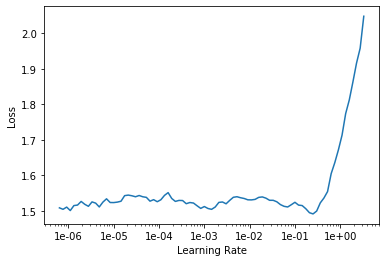

In [422]:
# find the perfect learning rates we can use the lr_find 
learn.lr_find()
# plot learning rate graph
learn.recorder.plot()

In [423]:
# Train our model using the fit_one_cycle method
learn.fit_one_cycle(4, 1e-02)

epoch,train_loss,valid_loss,time
0,0.922255,0.935026,00:12
1,0.860289,0.878412,00:12
2,0.734556,0.831982,00:12
3,0.588457,0.823436,00:12


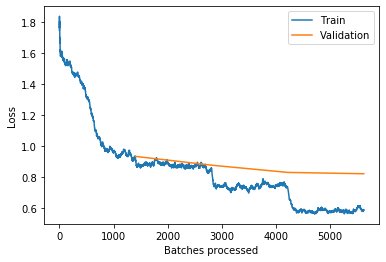

In [424]:
learn.recorder.plot_losses()

In [425]:
learn.save('movie-dot-1')

In [426]:
df.iloc[250]

user_id                            16
item_id                           302
rating                              5
timestamp                   877716993
title        L.A. Confidential (1997)
Name: 250, dtype: object

In [427]:
learn.predict(df.iloc[250])

(FloatItem 4.5850377, tensor(4.5850), tensor(4.5850))

In [428]:
learn.get_preds(ds_type=DatasetType.Valid)

[tensor([3.5232, 3.1683, 4.0037,  ..., 3.8524, 2.8280, 4.1228]),
 tensor([3., 5., 4.,  ..., 4., 3., 4.])]

In [429]:
# gives us movie title and movie_id
Mapping_file= dict(zip(df.title.tolist(),df.item_id.tolist()))

In [430]:
def pred_user_rating(ui):
    if ui in df.user_id.unique():
        ui_list = df[df.user_id == ui].item_id.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}
        
        predictedL = []
        for i, j in d.items():     
            predicted = learn.predict(df.iloc[ui])
            predictedL.append((i, predicted[0])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [431]:
df.iloc[100]

user_id               724
item_id               242
rating                  1
timestamp       883758268
title        Kolya (1996)
Name: 100, dtype: object

In [432]:
predicted = learn.predict(test.iloc[100])
predicted[0]

FloatItem 3.8242984

In [433]:
user_id = 100
pred = pred_user_rating(user_id)
pred

,ratings
movies,
Kolya (1996),1.7879121
Heavyweights (1994),1.7879121
Legends of the Fall (1994),1.7879121
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),1.7879121
"Hunt for Red October, The (1990)",1.7879121
"Jungle Book, The (1994)",1.7879121
Grease (1978),1.7879121
"Remains of the Day, The (1993)",1.7879121
Men in Black (1997),1.7879121


In [434]:
df[df['user_id']==100]

,user_id,item_id,rating,timestamp,title
133,100,302,4,891374528,L.A. Confidential (1997)
619,100,346,3,891375630,Jackie Brown (1997)
9854,100,288,2,891374603,Scream (1996)
11579,100,690,4,891375629,Seven Years in Tibet (1997)
15329,100,294,4,891375313,Liar Liar (1997)
16016,100,328,4,891375212,Conspiracy Theory (1997)
19300,100,750,4,891375016,Amistad (1997)
20941,100,272,4,891375629,Good Will Hunting (1997)
22111,100,268,3,891374982,Chasing Amy (1997)
23175,100,323,3,891375359,Dante's Peak (1997)


In [435]:
def evaluate(user_id):
    user_number = df[df['user_id']==user_id]
    t = 0
    for i in range(len(user_number)):
        if user_number['title'].iloc[i] in pred.index:
            t+=1
    print(t)

In [436]:
evaluate(100)   

0


# Sources
https://course.fast.ai/videos/?lesson=4

https://towardsdatascience.com/collaborative-filtering-with-fastai-3dbdd4ef4f00

https://github.com/TannerGilbert/Tutorials/blob/master/FastAI/Book%20Recommendation%20System.ipynb

https://medium.com/quantyca/deep-learning-for-collaborative-filtering-using-fastai-b28e197ccd59

https://www.kaggle.com/abhikjha/movielens-fastai-collab

https://blog.cambridgespark.com/nowadays-recommender-systems-are-used-to-personalize-your-experience-on-the-web-telling-you-what-120f39b89c3c